In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [9]:
# This cell is intentionally left blank for future processing or setup

## RGB color

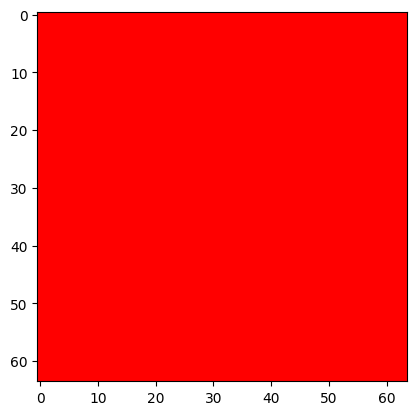

In [10]:
resolution = 64
red_img = np.zeros(shape=(64, 64, 3), dtype=np.float32)
red_img[...,0] = 1
plt.imshow(red_img)

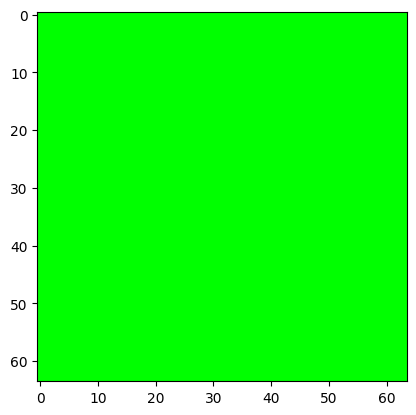

In [11]:
resolution = 64
green_img = np.zeros(shape=(64, 64, 3), dtype=np.float32)
green_img[...,1] = 1
plt.imshow(green_img)

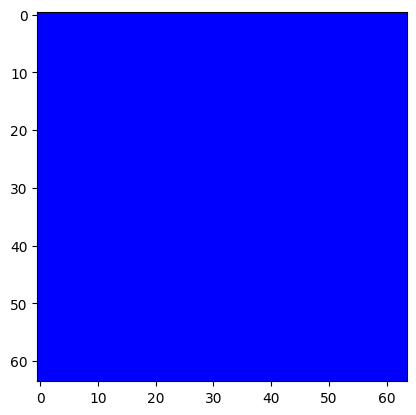

In [12]:
resolution = 64
blue_img = np.zeros(shape=(64, 64, 3), dtype=np.float32)
blue_img[...,2] = 1
plt.imshow(blue_img)

## Secondary colors - CMY format
- 
<span style="color:magenta">magenta</span>:
<span style="color:red">red</span> plus
<span style="color:blue">blue</span>
- 
<span style="color:cyan">cyan</span>:
<span style="color:green">green</span> plus
<span style="color:blue">blue</span>
- 
<span style="color:yellow">yellow</span>:
<span style="color:red">red</span> plus
<span style="color:green">green</span>

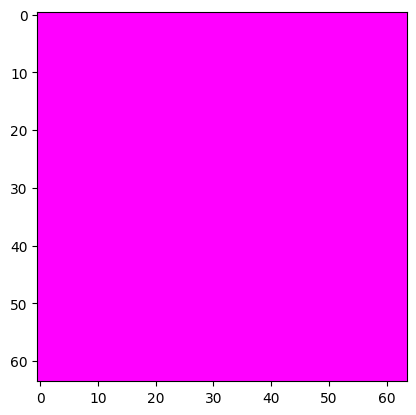

In [13]:
magenta_img = red_img + blue_img
plt.imshow(magenta_img)

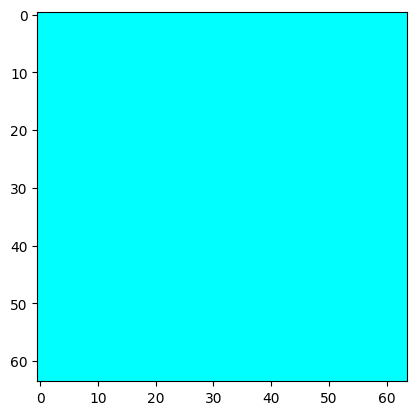

In [14]:
cyan_img = green_img + blue_img
plt.imshow(cyan_img)

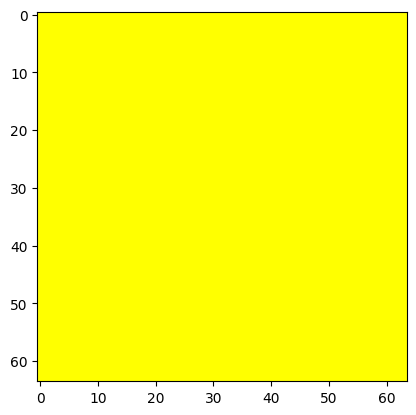

In [15]:
yellow_img = red_img + green_img
plt.imshow(yellow_img)

<span style="background-color:rgba(0, 0, 0, 0.2)"><span style="color:red">$red = (1, 0, 0)$</span> \
<span style="color:green">$green = (0, 1, 0)$</span> \
<span style="color:blue">$blue = (0, 0, 1)$</span> \
<span style="color:magenta">$magenta = (1, 0, 1)$</span> \
<span style="color:cyan">$cyan = (0, 1, 1)$</span> \
<span style="color:yellow">$yellow = (1, 1, 0)$</span> </span>

## HSI format

$\theta = \cos^{-1}{\{ \frac{[(R-G)+(R-B)]/2}{[(R-G)^2+(R-B)(G-B)]^{1/2}} \} }$

$H=\left\{\begin{split}
 \theta, B \leq G\\
 2\pi - \theta, B>G\\ 
\end{split}\right.$

$S=1-\frac{3}{R+G+B}[\min(R,G,B)]$

$I=(R+G+B)/3$

In [16]:
def rgb_to_hsi(rgb):
    r, g, b = rgb[...,0], rgb[...,1], rgb[...,2]
    theta = np.arccos(
        (((r - g) + (r - b)) / 2)
        /
        (((r - g) ** 2 + (r - b) * (g - b)) ** (1 / 2))
    )
    theta = theta
    
    H = np.zeros_like(theta)
    H[b <= g] = theta[b <= g]
    H[b > g] = 2 * np.pi - theta[b > g]
    
    S = 1 - 3 / (r + g + b) * np.minimum(np.minimum(r, g), b)
    
    I = (r + g + b) / 3
    hsi = np.stack([H, S, I], axis=-1)
    
    return hsi

In [17]:
rgb_to_hsi(np.array([[1,0,1]]))

array([[5.23598776, 1.        , 0.66666667]])

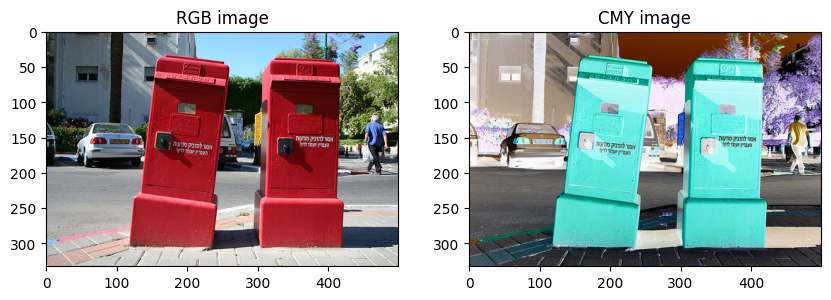

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


if __name__ == '__main__':
    original_img = cv2.imread('./example_image.jpeg')
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

    # TODO: now the image value is in range (0, 255), normalize the value into range (0, 1)
    normalized_img = original_img / 255

    # TODO: convert the red-green-blue format into cyan-magenta-yellow
    cmy_img = 1-normalized_img

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(normalized_img)
    axs[0].set_title('RGB image')
    axs[1].imshow(cmy_img)
    axs[1].set_title('CMY image')
    plt.show()